In [2]:
! pip install pydot


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import os

# Load MNIST dataset
def load_mnist():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    # One-hot encode the labels
    y_train = keras.utils.to_categorical(y_train, num_classes=10)
    y_test = keras.utils.to_categorical(y_test, num_classes=10)

    return x_train, y_train, x_test, y_test


# Define CNN model with improved architecture
def create_model():
    model = keras.Sequential(
        [
            keras.layers.Conv2D(
                64, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)
            ),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Dropout(0.3),
            keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Dropout(0.3),
            keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Dropout(0.4),
            keras.layers.Flatten(),
            keras.layers.Dense(256, activation="relu"),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(10, activation="softmax"),  # Output layer for 10 classes
        ]
    )
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    # Plot the model architecture and save it as an image
    keras.utils.plot_model(
        model, 
        to_file="model_architecture_improved.png",  # Save as an image file
        show_shapes=True,  # Display the shapes of the layers
        show_layer_names=True  # Display the layer names
    )

    # Display the model summary
    model.name = "Improved_Numbers_Recognition_CNN_Model"
    model.summary()

    return model


# Train and save model
(x_train, y_train, x_test, y_test) = load_mnist()
model = create_model()
history = model.fit(
    x_train, y_train, epochs=8, batch_size=64, validation_data=(x_test, y_test)
)
model.save("mnist_model_improved.h5")  # Save model for later use
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
#     return history, model


# history, model = train_and_save_model()

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


d:\SHU\ML_lab\Assesment\ml_ocr\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Improved_Numbers_Recognition_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965,130 (3.68 MB)

 Trainable params: 963,722 (3.68 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 93ms/step - accuracy: 0.8673 - loss: 0.4498 - val_accuracy: 0.9860 - val_loss: 0.0407
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 89s 95ms/step - accuracy: 0.9770 - loss: 0.0718 - val_accuracy: 0.9900 - val_loss: 0.0289
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.9816 - loss: 0.0554 - val_accuracy: 0.9908 - val_loss: 0.0268
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.9854 - loss: 0.0479 - val_accuracy: 0.9922 - val_loss: 0.0238
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 89s 94ms/step - accuracy: 0.9864 - loss: 0.0444 - val_accuracy: 0.9937 - val_loss: 0.0180
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 104s 111ms/step - accuracy: 0.9868 - loss: 0.0410 - val_accuracy: 0.9937 - val_loss: 0.0173
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 135s 144ms/step - accuracy: 0.9893 - loss: 0.0351 - val_accuracy: 0.9933 - val_loss: 0.0220
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 98s 104ms/step - accuracy: 0.9904 - loss: 0.0299 - val

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9899 - loss: 0.0287
Test Accuracy: 99.16%


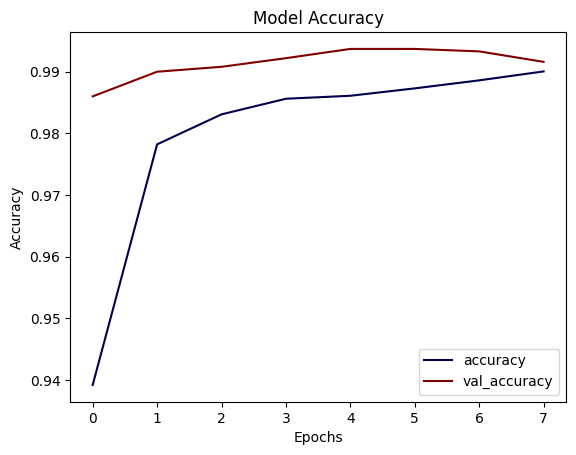

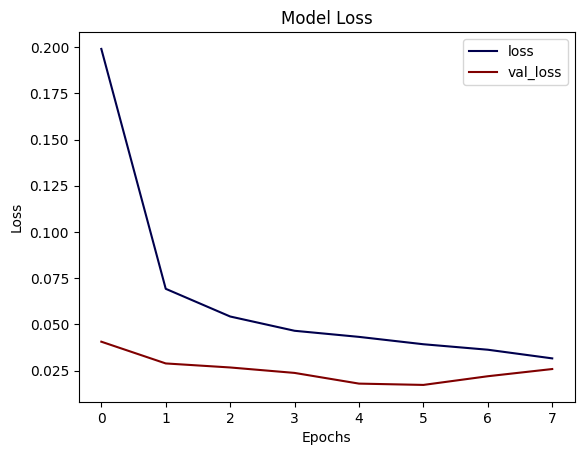

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


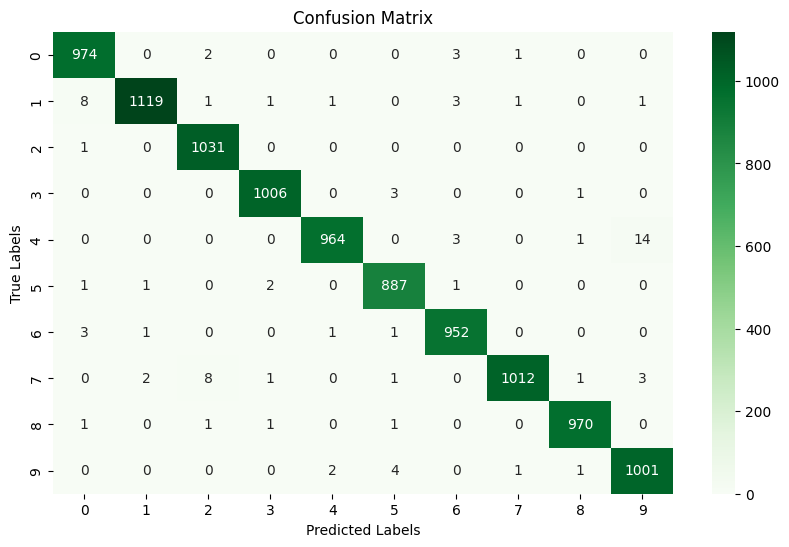

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

metrics = pd.DataFrame(history.history)

# Plot training and validation accuracy
metrics[['accuracy', 'val_accuracy']].plot(title="Model Accuracy", xlabel="Epochs", ylabel="Accuracy", colormap='seismic')
plt.show()

# Plot training and validation loss
metrics[['loss', 'val_loss']].plot(title="Model Loss", xlabel="Epochs", ylabel="Loss", colormap='seismic')
plt.show()

# Generate predictions
predictions_prob = model.predict(x_test)
predictions = np.argmax(predictions_prob, axis=1)
true_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integers

# Generate and display confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
# print("Classification Report:")
# print(classification_report(true_labels, predictions))

In [8]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt


def main():
    dataset_path = r"D:\SHU\ML_lab\Assesment\Number_Test_Data"
    all_images = [img for img in os.listdir(dataset_path) if img.endswith(".png")]
    image_path = [os.path.join(dataset_path, img_path) for img_path in all_images]
    image_name = [os.path.basename(path) for path in image_path]
    print(image_name)
    return image_path


image_path = main()

['000.png', '001.png', '002.png', '003.png', '004.png', '005.png', '006.png', '007.png', '008.png', '009.png', '010.png', '011.png', '012.png', '013.png', '014.png']


### # Pre-Process the first 10 digit files


Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\000.png


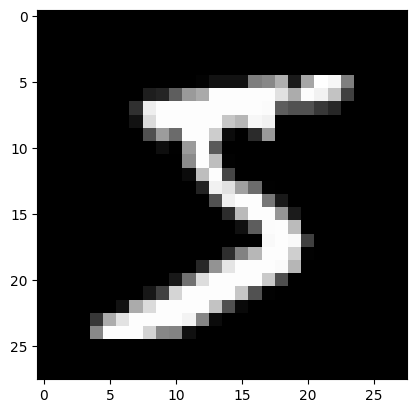

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\001.png


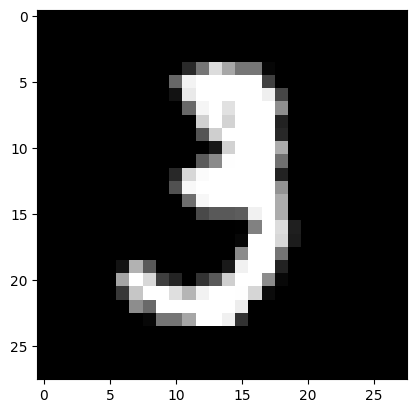

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\002.png


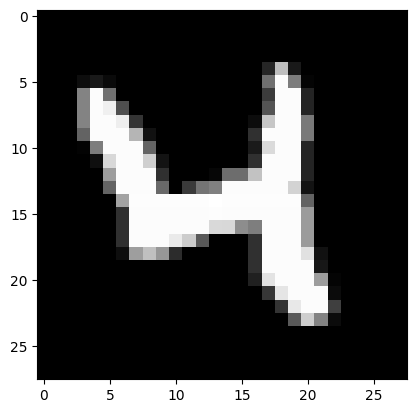

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\003.png


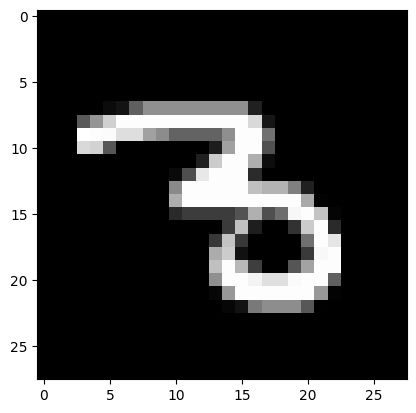

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\004.png


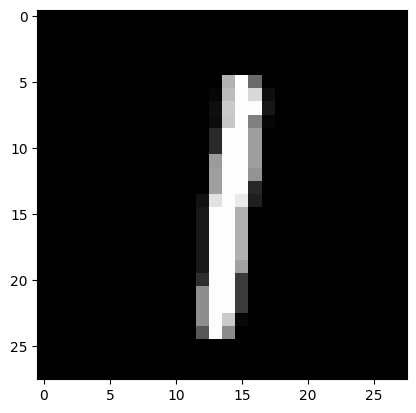

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\005.png


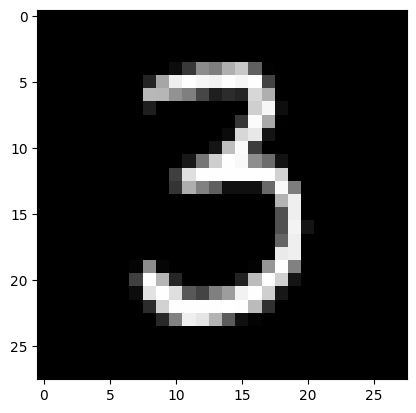

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\006.png


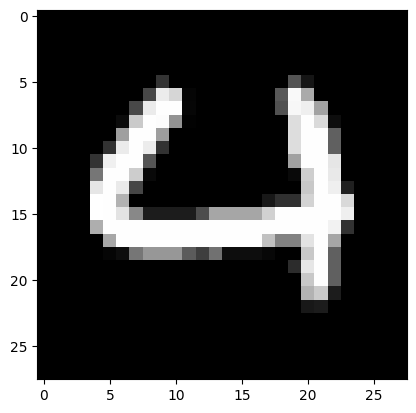

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\007.png


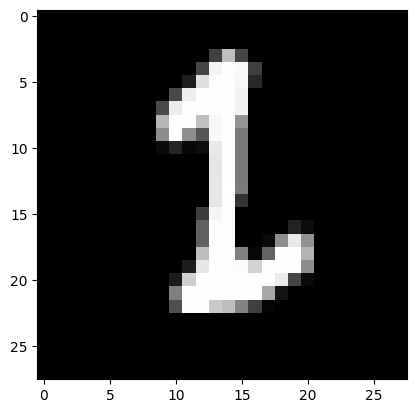

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\008.png


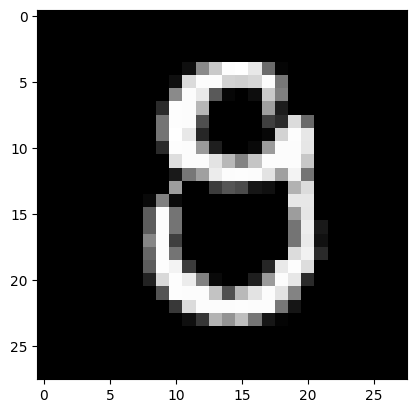

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\009.png


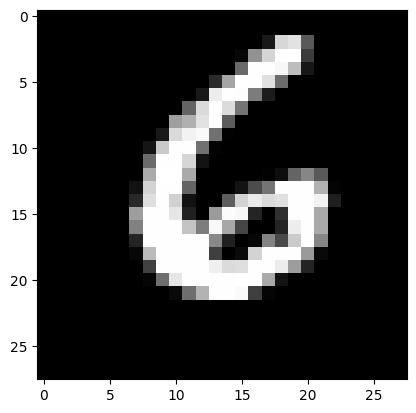

In [9]:
global tendigit_images
tendigit_images = []


def digit_images(image_path):
    for image in image_path[:10]:
        print(f"Processing raw image {image}")

        image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        # resize_digit = cv2.resize(image, (28, 28), interpolation= cv2.INTER_AREA)
        # np_digit = resize_digit.astype(np.float32) / 255.0
        # blur_digit = cv2.GaussianBlur(np_digit, (3, 3), 0)
        # image = np.expand_dims(blur_digit, axis=-1)
        plt.imshow(image, cmap="gray")
        plt.show()
        # print(f"Loaded image shape: {image.shape}")  # shape of the raw image
        tendigit_images.append(image)

    return tendigit_images


digit_images(image_path);

Pre-process the image to extract digit regions.
Returns:

- processed_digits: which is required for the training the model


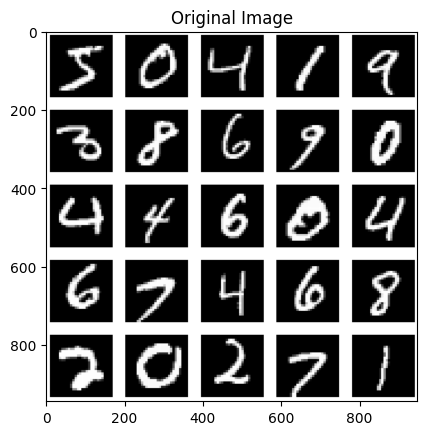

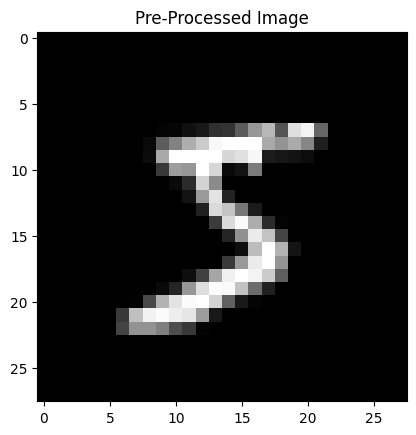

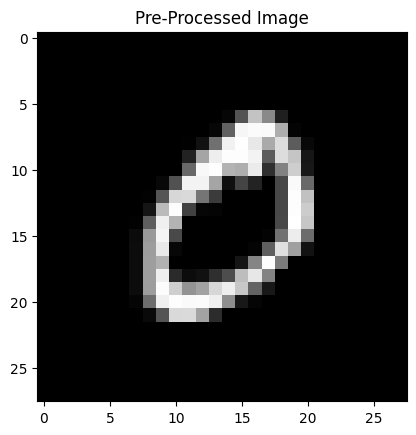

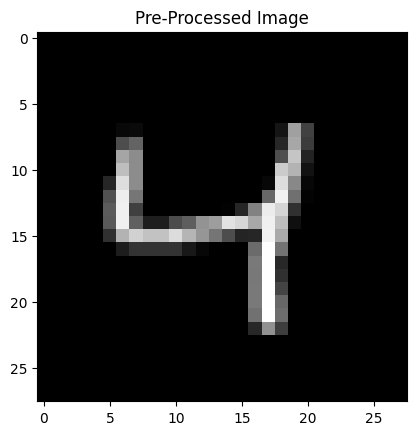

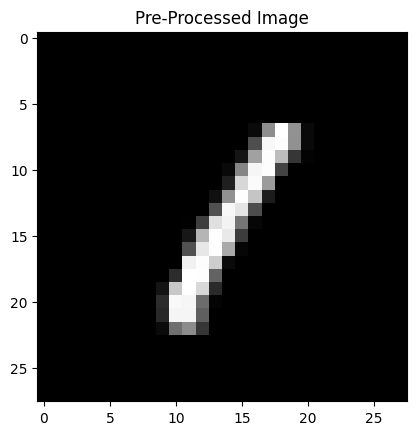

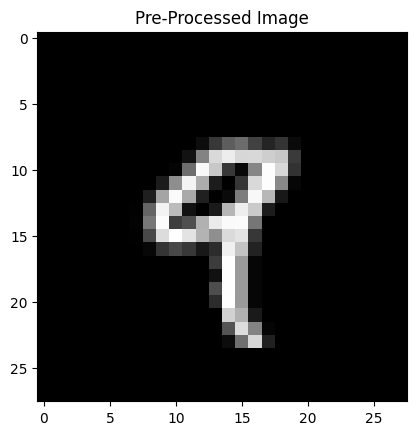

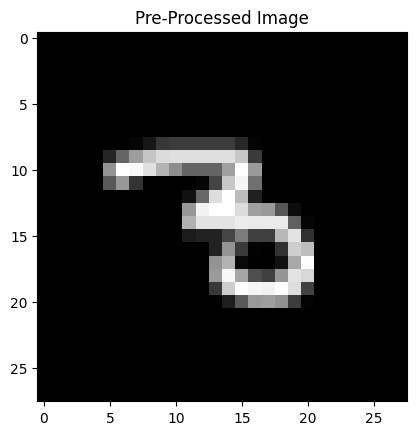

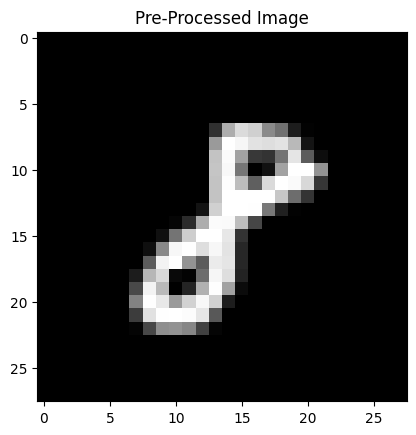

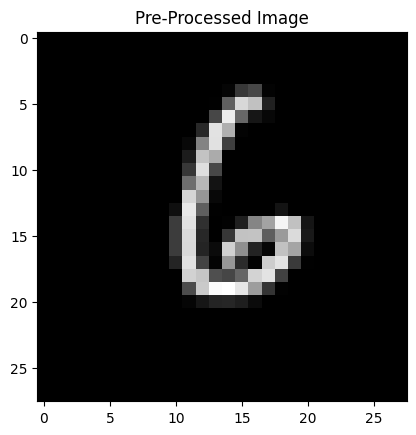

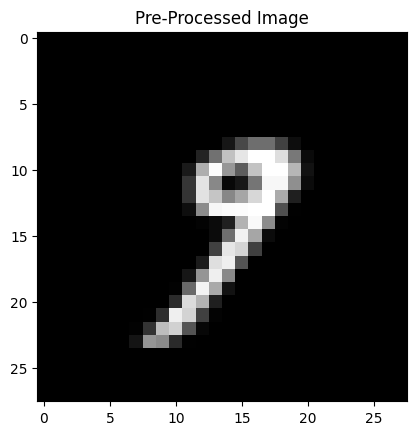

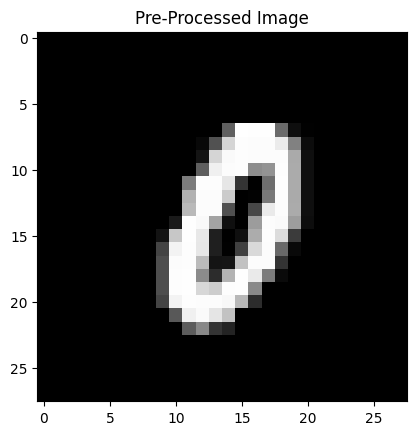

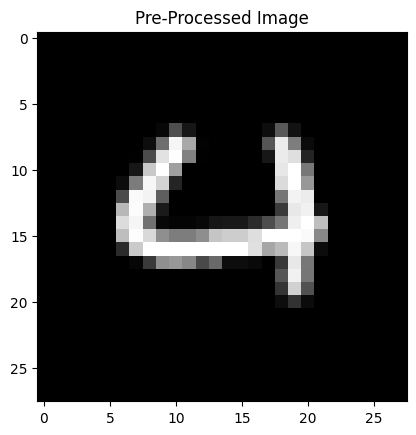

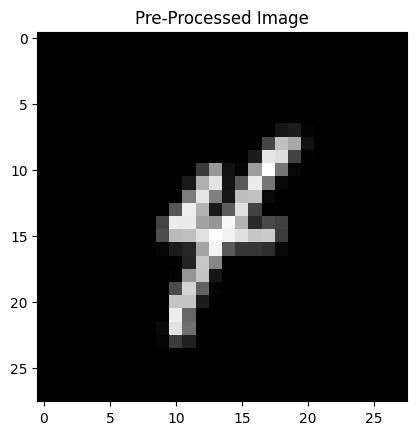

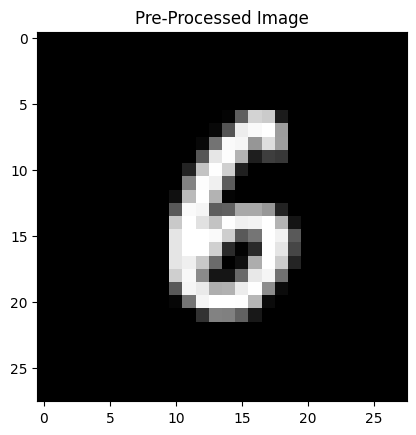

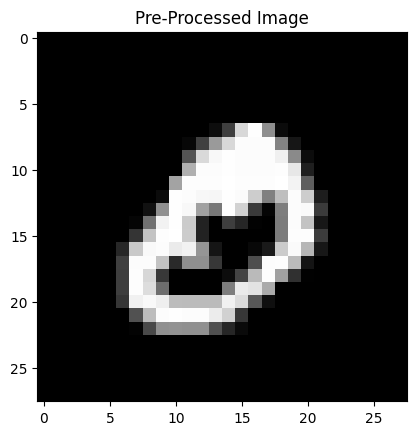

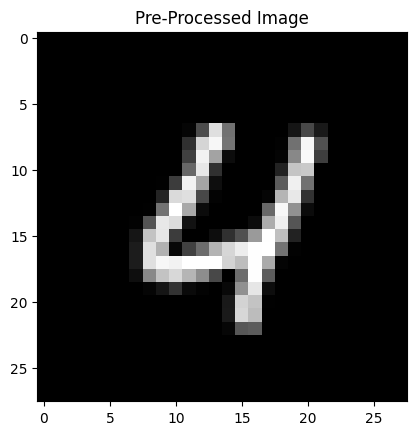

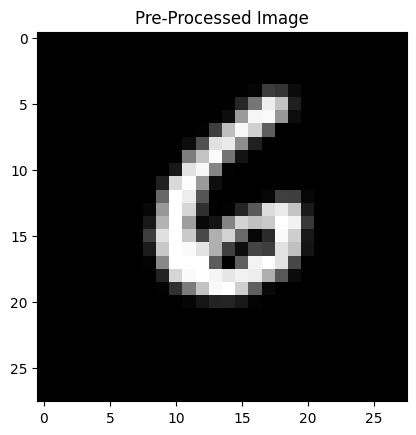

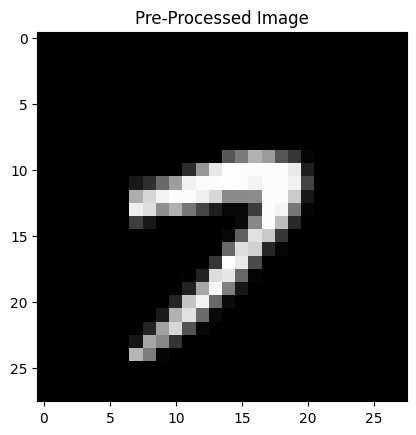

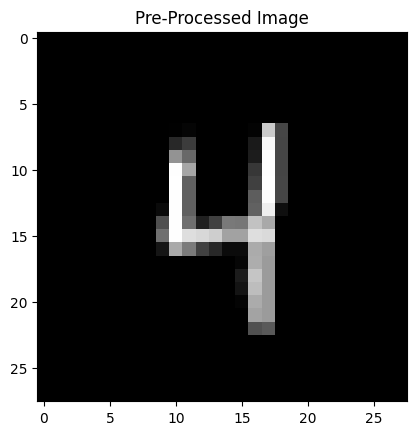

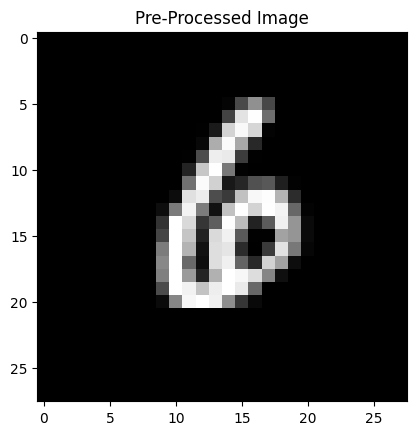

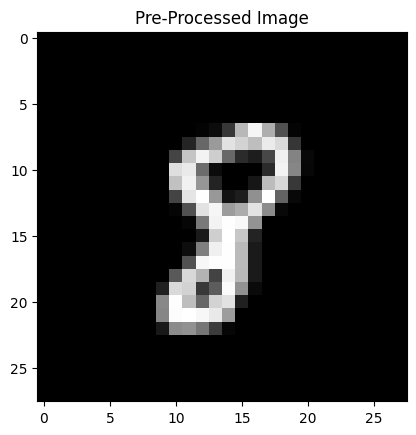

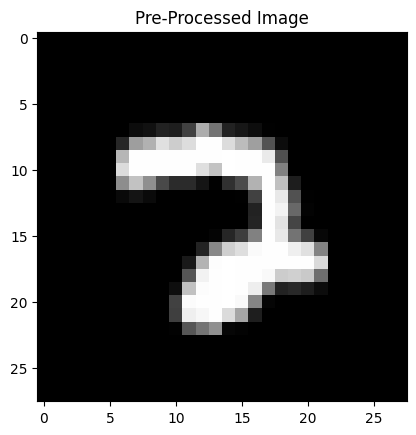

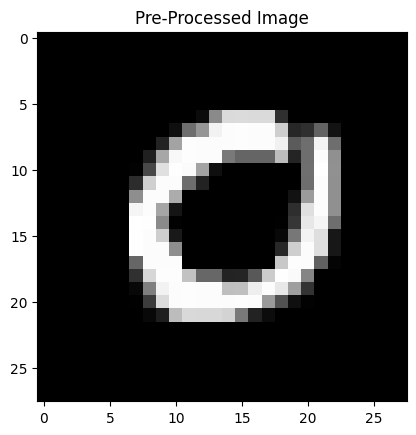

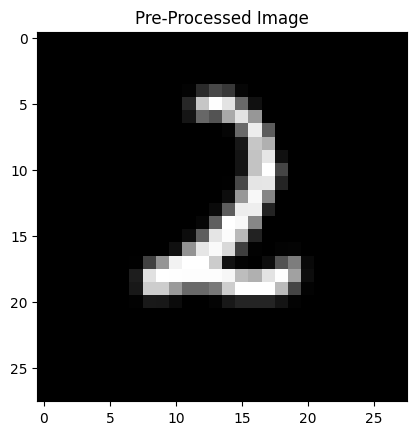

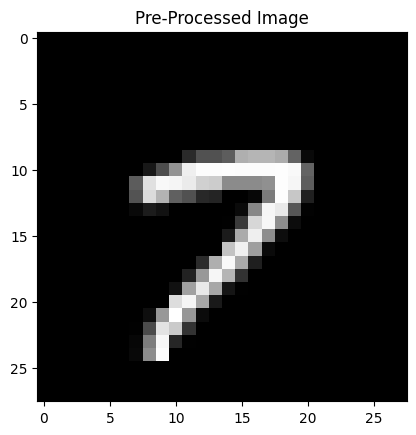

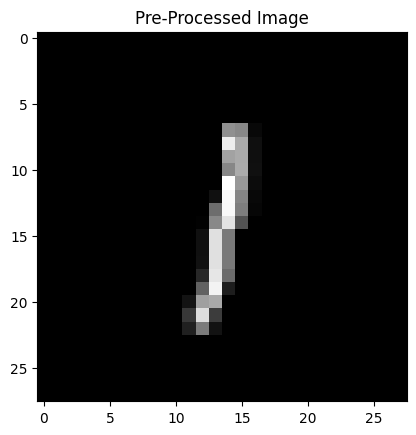

In [10]:
def find_counters(image, binary, min_area=0, max_area=0):
    # Apply Canny edge detection
    edges = cv2.Canny(binary, 100, 200)

    # Morphological operations to clean up edges
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Find contours
    contours, hierarchy = cv2.findContours(
        eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    if len(contours) == 0:
        return contours

    if min_area != 0 and max_area != 0:
        contours = [
            contour
            for contour in contours
            if min_area <= cv2.contourArea(contour) <= max_area
        ]

    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    sorted_contours = sorted(
        zip(contours, bounding_boxes),
        key=lambda b: (b[1][1] // 50, b[1][0])  # Sort by row (y) and then column (x)
    )
    contours = [c[0] for c in sorted_contours]
    

    return contours


def preprocess_digitGrid(image_path):

    # Convert to grayscale and apply blur
    for image in image_path[10:11]:
        # print(image)
        image = cv2.imread(image)
        plt.imshow(image)
        plt.title("Original Image")
        plt.show()
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 2)
        _, binary = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY_INV)
        # Find contours that likely correspond to digits
        contours = find_counters(image.copy(), binary)
        processed_digits = []
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            digit_roi = gray[y : y + h, x : x + w]
            resized_digit = cv2.resize(digit_roi, (28, 28))
            height, width = resized_digit.shape
            padded_image = np.zeros((height + 8, width + 8), dtype=np.uint8)
            padded_image[4 : height + 4, 4 : width + 4] = resized_digit
            final_image = cv2.resize(padded_image, (28, 28))
            processed_image = final_image.astype("float32") / 255.0
            processed_image = processed_image.reshape(28, 28, 1)

            processed_digits.append(((x, y, w, h), processed_image))
            plt.imshow(final_image, cmap="gray")
            plt.title("Pre-Processed Image")
            plt.grid(False)
            plt.show()  

        return processed_digits


processed_digits= preprocess_digitGrid(image_path);

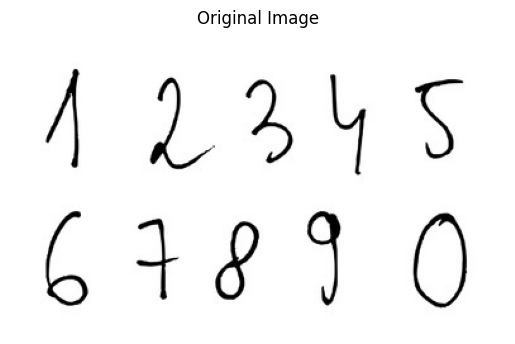

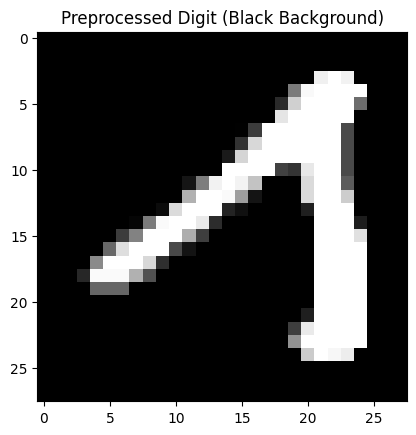

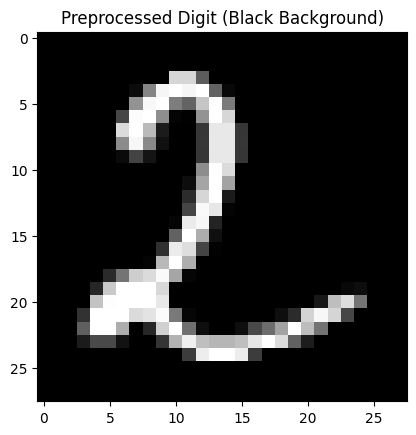

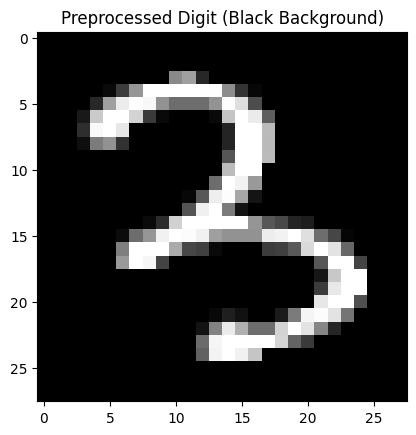

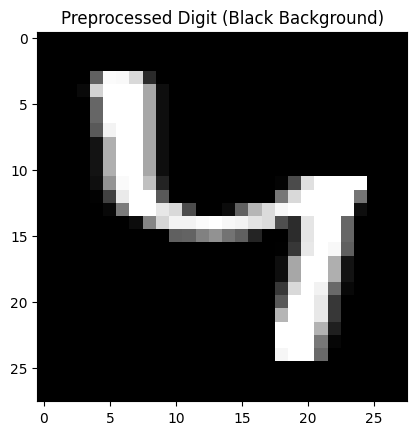

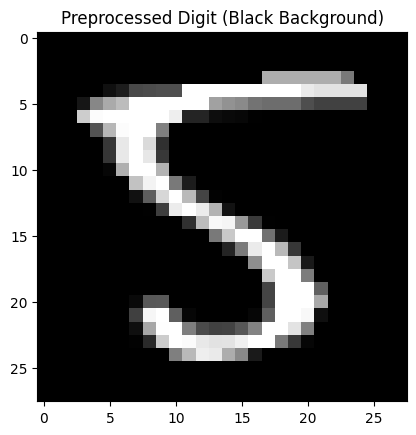

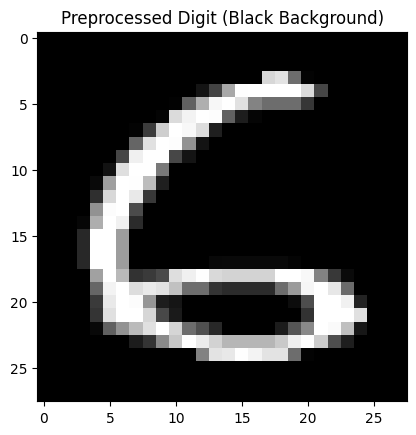

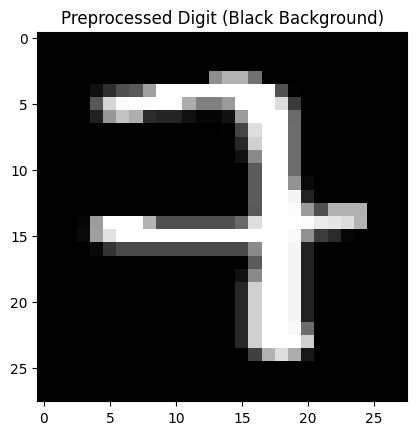

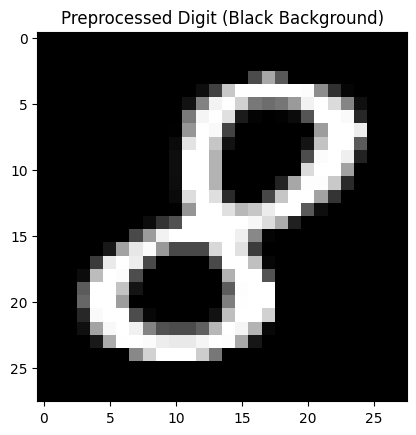

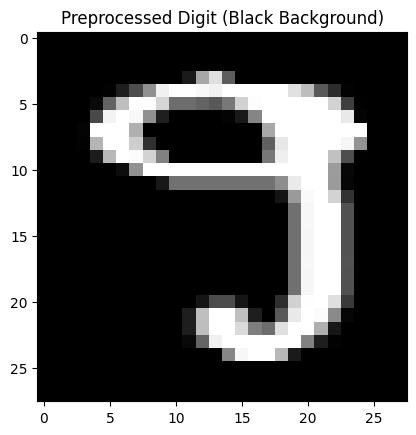

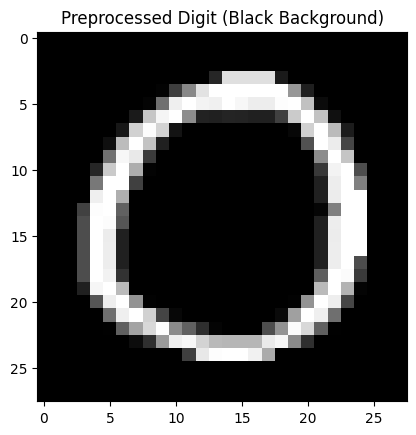

In [11]:
def find_counters(image, binary, min_area=0, max_area=0):
    # Apply Canny edge detection
    edges = cv2.Canny(binary, 100, 200)

    # Morphological operations to clean up edges
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Find contours
    contours, hierarchy = cv2.findContours(
        eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    if len(contours) == 0:
        return contours

    if min_area != 0 and max_area != 0:
        contours = [
            contour
            for contour in contours
            if min_area <= cv2.contourArea(contour) <= max_area
        ]
    # Sort contours top-to-bottom and left-to-right
    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    sorted_contours = sorted(
        zip(contours, bounding_boxes),
        key=lambda b: (b[1][1] // 50, b[1][0])  # Sort by row (y) and then column (x)
    )
    contours = [c[0] for c in sorted_contours]
    return contours

def preprocess_whitebg(image_paths):
    processed_white_bg = []
    

    for image in image_paths[11:12]:
        # Read the image
        image = cv2.imread(image)

        # Display the original image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")
        plt.show()

        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5),4)
    
        # Apply adaptive thresholding to isolate digits
        thresholded_img = cv2.adaptiveThreshold(
            blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY_INV, 99, 45  # Corrected here
        )

        # Find contours of the digits
        contours = find_counters(image.copy(), thresholded_img)

        for contour in contours:
            # Get bounding box for each contour
            x, y, w, h = cv2.boundingRect(contour)

            # Extract the region of interest (ROI)
            digit_roi = thresholded_img[y:y + h, x:x + w]

            # Resize the digit to 28x28
            resized_digit = cv2.resize(digit_roi, (28, 28))

            # Add padding to the resized digit
            height, width = resized_digit.shape
            padded_image = np.zeros((height + 8, width + 8), dtype=np.uint8)
            padded_image[4:height + 4, 4:width + 4] = resized_digit

            # Resize back to 28x28 to ensure uniformity
            final_image = cv2.resize(padded_image, (28, 28))

            # Normalize the image to [0, 1]
            processed_image = final_image.astype("float32") / 255.0

            # Append the processed image to the list
            processed_white_bg.append(((x, y, w, h), processed_image))

            # Display the preprocessed digit
            plt.imshow(final_image, cmap="gray")
            plt.title("Preprocessed Digit (Black Background)")
            plt.axis("on")
            plt.show()

    return processed_white_bg

                


processed_white_bg = preprocess_whitebg(image_path);

Loads trained CNN model and predicts digits from preprocessed images.

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


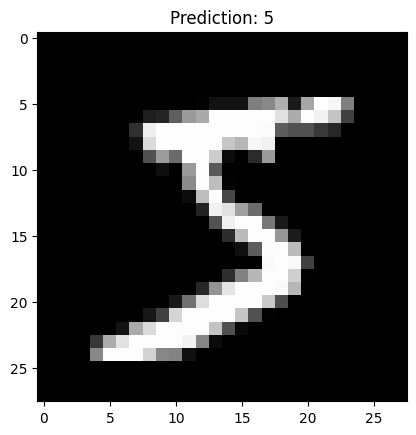

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


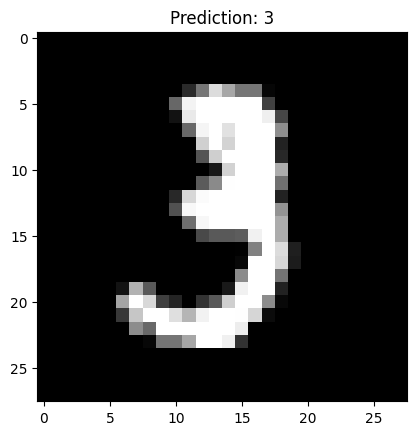

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


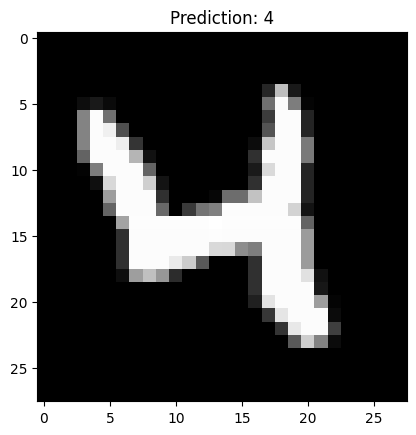

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


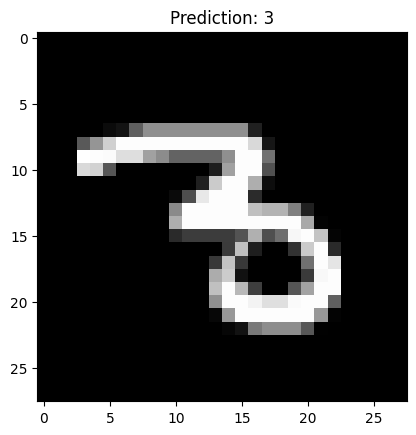

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


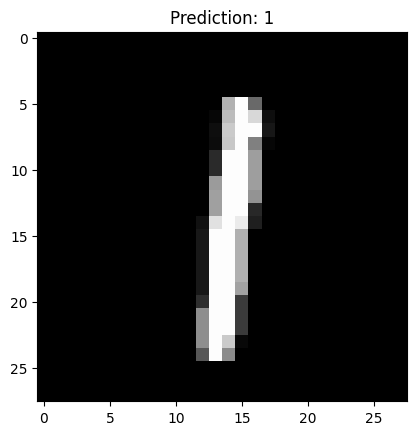

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


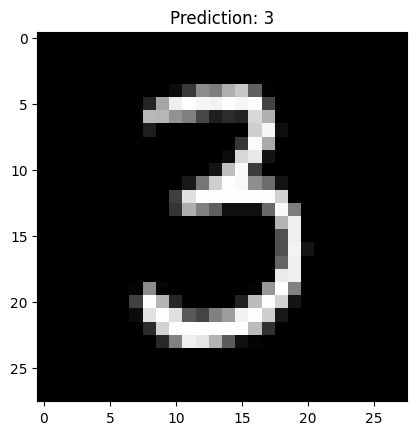

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


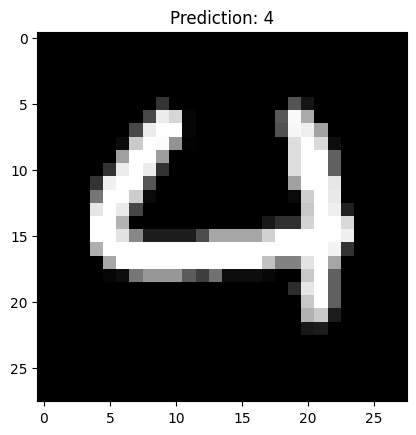

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


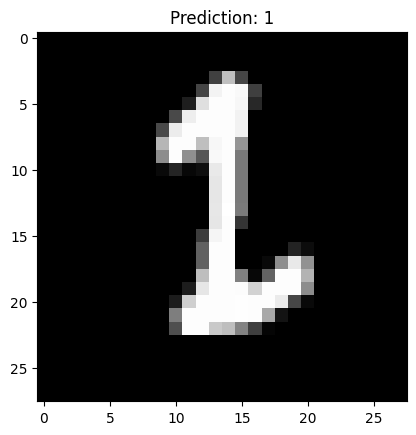

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


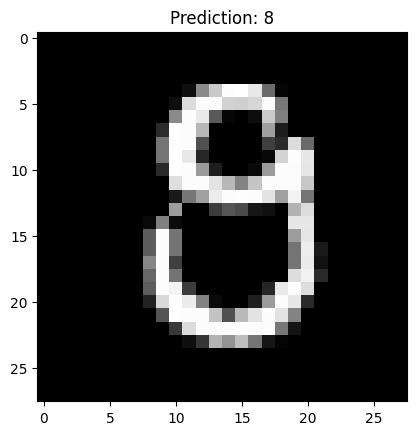

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


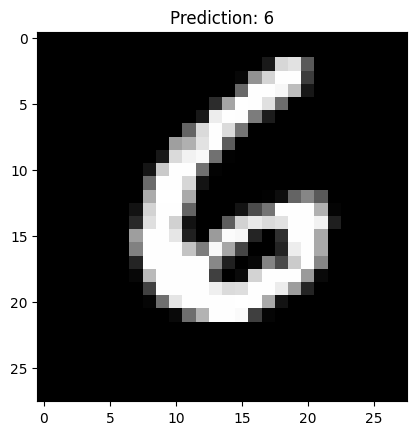

In [12]:
def load_model_and_predict(tendigit_images):
    model = keras.models.load_model("mnist_model.h5")  # Load trained model
    predictions = []

    for img in tendigit_images:
        # Ensure image is 28x28 and normalized

        # img = img / 255.0  # Normalize
        # img = cv2.resize(img, (28, 28))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # print(f"Loaded img shape: {img.shape}")

        img = img.reshape(1, 28, 28, 1) / 255.0
        print("Image shape before prediction:", img.shape)
        pred_probs = model.predict(img)  # Get probability distribution
        pred_digit = np.argmax(pred_probs)  # Get highest probability digit
        # print(f"Raw Model Output: {pred_probs}")  # Print confidence scores
        # print(f"Predicted Digit: {pred_digit}")

        predictions.append(pred_digit)
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(f"Prediction: {pred_digit}")
        # plt.axis("on")
        plt.grid(False)
        plt.show()

    return predictions


load_model_and_predict(tendigit_images);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


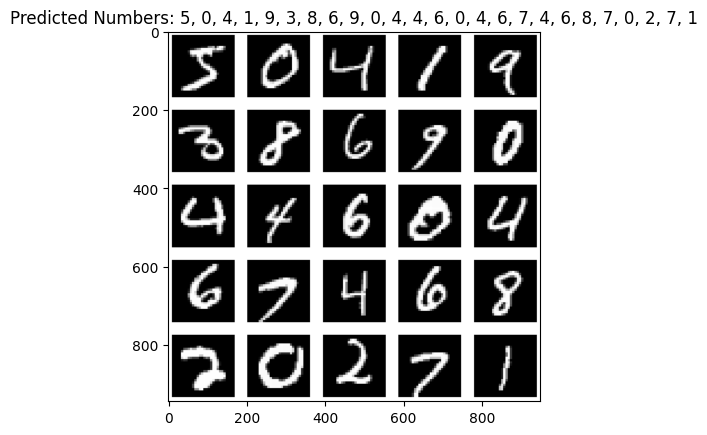

In [13]:
def predict_digitsgrid(processed_digits, model):
    # model = keras.models.load_model("mnist_model.h5")
    predictions = []
    for image in image_path[10:11]:
        # Convert to grayscale and apply blur
        image = cv2.imread(image)
        

        for (x, y, w, h), digit_image in processed_digits:
            # Prepare the image for prediction (add batch dimension)
            digit_input = np.expand_dims(digit_image, axis=0)
            pred_probs = model.predict(digit_input)
            pred_digit = np.argmax(pred_probs)
            predictions.append(pred_digit)

    return predictions, image

# Ensure processed_digits is defined by calling preprocess_image
# processed_digits, image = preprocess_digitGrid(image_path)

model = keras.models.load_model("mnist_model.h5")
predictions, img = predict_digitsgrid(processed_digits, model)

# Display the annotated image (convert BGR to RGB for display in matplotlib)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Numbers: {', '.join(map(str, predictions))}")
plt.grid(False)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


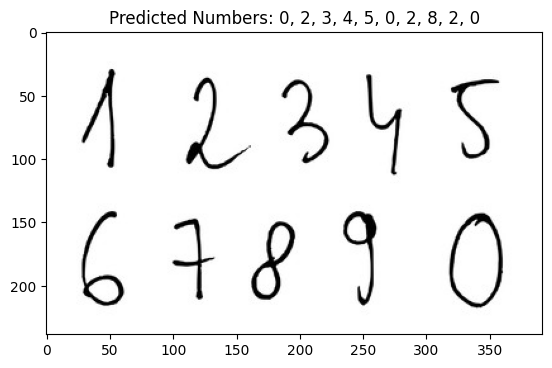

In [18]:
def predict_whitebg(processed_white_bg, model):
    # model = keras.models.load_model("mnist_model.h5")
    predictions = []
    for image in image_path[11:12]:
        # Convert to grayscale and apply blur
        image = cv2.imread(image)
        

        for (x, y, w, h), digit_image in processed_white_bg:
            # Prepare the image for prediction (add batch dimension)
            digit_input = np.expand_dims(digit_image, axis=0)
            pred_probs = model.predict(digit_input)
            pred_digit = np.argmax(pred_probs)
            predictions.append(pred_digit)
            

    return predictions, image


model = keras.models.load_model("mnist_model.h5")
predictions, img = predict_whitebg(processed_white_bg, model)

# Display Predictions
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Numbers: {', '.join(map(str, predictions))}")
plt.grid(False)
plt.show()


['D:\\SHU\\ML_lab\\Assesment\\Number_Test_Data\\012.png', 'D:\\SHU\\ML_lab\\Assesment\\Number_Test_Data\\013.png', 'D:\\SHU\\ML_lab\\Assesment\\Number_Test_Data\\014.png']
['012.png', '013.png', '014.png']
Processing image 12 with custom process
Running step: load_images with kwargs: {}
Running step: resized_images with kwargs: {}
Running step: enhance_contrast with kwargs: {'clip_limit': 2.0}
Running step: apply_threshold with kwargs: {'method': 'adaptive', 'threshold': 30}
Applying thresholding method: adaptive, threshold: 30


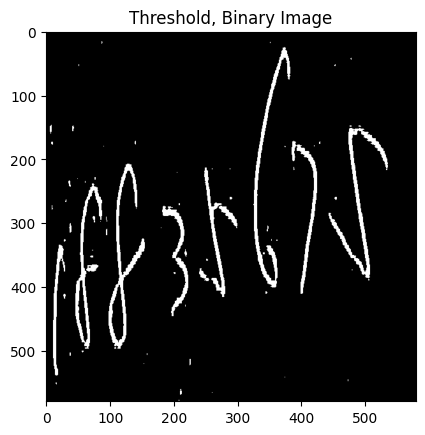

Running step: extract_digits with kwargs: {'area': 500}


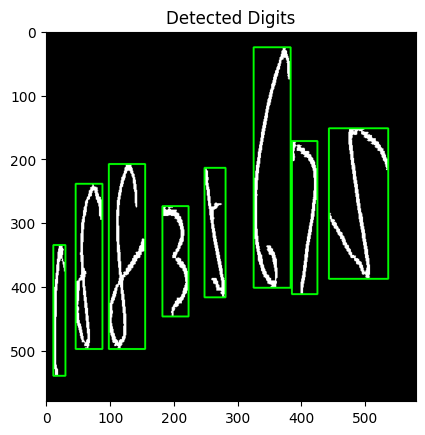

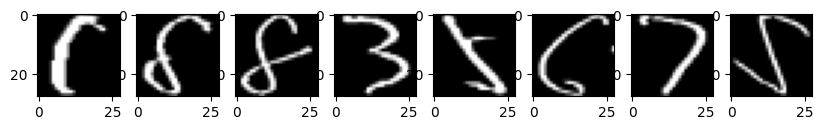

Number of digits extracted from 012.png: 8
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
final predictions:  [np.int64(6), np.int64(6), np.int64(8), np.int64(3), np.int64(5), np.int64(0), np.int64(7), np.int64(5)]
Processing image 13 with custom process
Running step: load_images with kwargs: {}
Running step: resized_images with kwargs: {}
Running step: apply_threshold wit

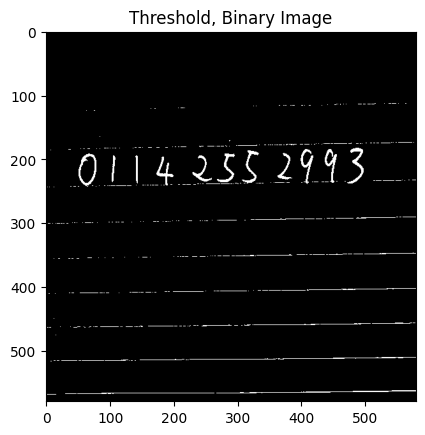

Running step: remove_lines with kwargs: {'method': 'houghLine'}
Running step: apply_erosion_dilation with kwargs: {}


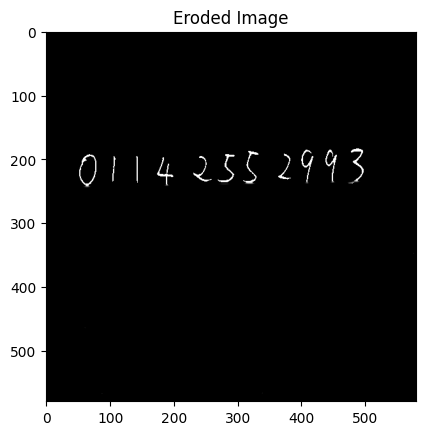

Running step: extract_digits with kwargs: {'area': 30}


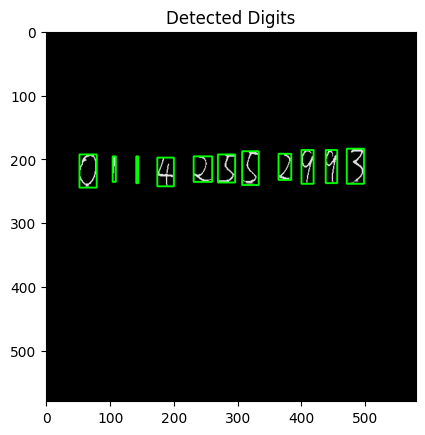

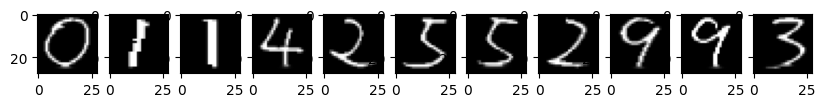

Number of digits extracted from 013.png: 11
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
final predictions:  [np.int64(0)

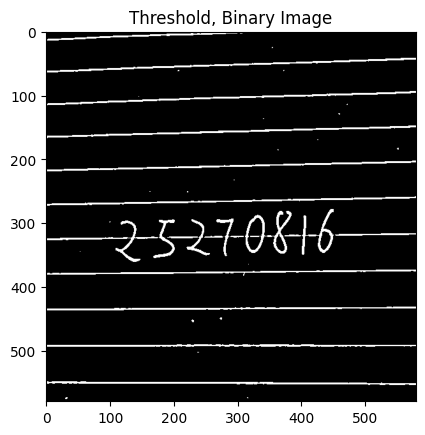

Running step: remove_lines with kwargs: {'method': 'houghLine'}
Running step: apply_erosion_dilation with kwargs: {}


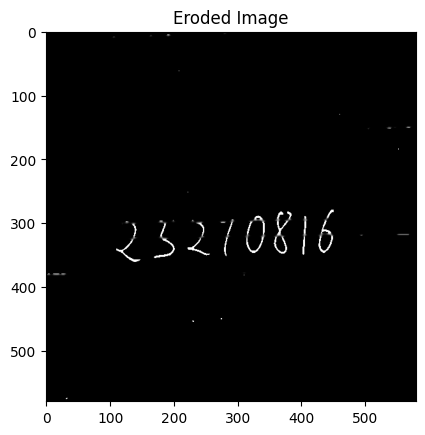

Running step: extract_digits with kwargs: {'area': 70}


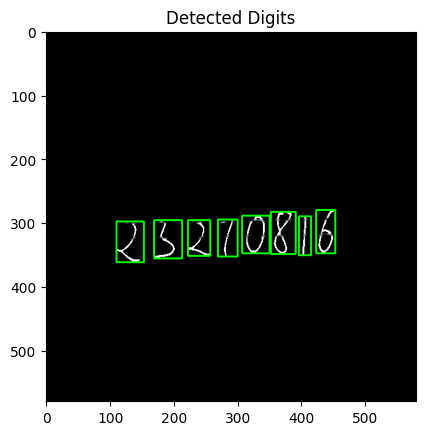

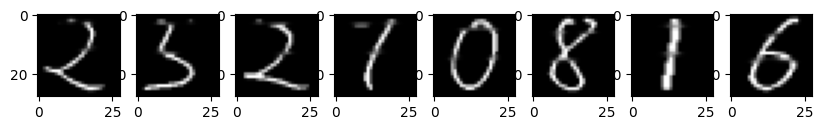

Number of digits extracted from 014.png: 8
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
final predictions:  [np.int64(2), np.int64(5), np.int64(2), np.int64(1), np.int64(0), np.int64(8), np.int64(1), np.int64(6)]


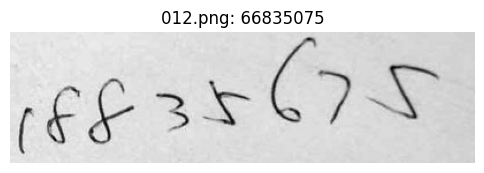

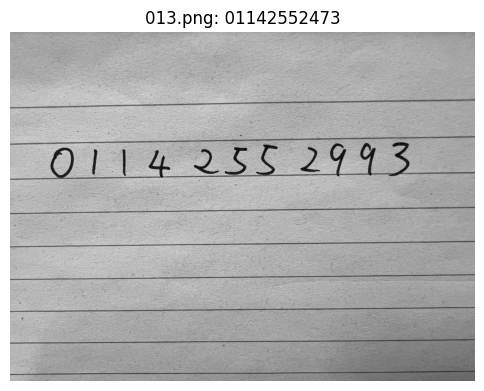

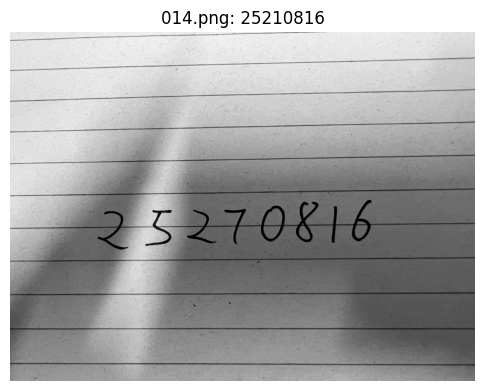

In [14]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt


# Load remaining images
def load_images(image):
    image = cv2.imread(image)
    return image

# Load, resize and grayscale the images
def resized_images(image):
    resized_image = cv2.resize(image, (580, 580), interpolation=cv2.INTER_AREA)

    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    # cv2.imshow("Image", gray_image)
    # cv2.waitKey(0)

    return gray_image

# Apply CLAHE for contrast enhancement
def enhance_contrast(image, clip_limit=2.0):
    
    clahe = cv2.createCLAHE(clip_limit, tileGridSize=(11, 11))
    enhanced_image = clahe.apply(image)
    # cv2.imshow("Enhanced Image", enhanced_image)
    # cv2.waitKey(0)
    return enhanced_image

# Apply either binary or adaptive thresholding.
def apply_threshold(image, method, threshold):
    
    print(f"Applying thresholding method: {method}, threshold: {threshold}")
    if method == "13_binary":
        _, bin_img = cv2.threshold(image, threshold, 225, cv2.THRESH_BINARY_INV)
    elif method == "adaptive":
        bin_img = cv2.GaussianBlur(image, (5,5), 0)
        bin_img = cv2.adaptiveThreshold(
            bin_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 25, 12
        )
    else:
        bin_img = image

    plt.imshow(bin_img, cmap="gray")
    plt.title("Threshold, Binary Image")
    plt.show()
    return bin_img


# Detect and remove lines using Hough Line Transform
def remove_lines(thresholded_image, method):

    if method == "houghLine":
        lines = cv2.HoughLinesP(
            thresholded_image, 1, np.pi / 180, 100, minLineLength=5, maxLineGap=90
        )
        mask = np.zeros_like(thresholded_image)
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(mask, (x1, y1), (x2, y2), (255), 2)
        thresholded_image = cv2.inpaint(thresholded_image, mask, 3, cv2.INPAINT_TELEA)

    elif method == "kernelLine":
        line_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1 ))
        detected_lines = cv2.morphologyEx(thresholded_image, cv2.MORPH_OPEN, line_kernel, iterations=1)
        cnts_lines, _ = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for c in cnts_lines:
            cv2.drawContours(thresholded_image, [c], -1, (0) -1)

    # cv2.imshow("Lines Removed", thresholded_image)
    # cv2.waitKey(0)
    return thresholded_image

# Optional: Apply a slight erosion to separate merged digits
def apply_erosion_dilation(thresholded_image):
    
    kernel_small = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    thresholded_image = cv2.erode(thresholded_image, kernel_small, iterations=1)
    plt.imshow(thresholded_image, cmap="gray")
    plt.title("Eroded Image")
    plt.show()
    return thresholded_image

# extract digits from images
def extract_digits(thresholded_image, area):
    # Debug: Visualize contours
    contours, _ = cv2.findContours(
        thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    # debug_image = cv2.cvtColor(thresholded_image.copy(), cv2.COLOR_GRAY2BGR)
   
    for c in contours:
        
        # Filter out too-small or too-large bounding boxes
        areas = cv2.contourArea(c)        
        if areas < area:
            cv2.drawContours(thresholded_image, [c], -1, (0), -1)
        countors = [c for c in contours if cv2.contourArea(c) > area] 
        # Sort by y first (for multiple rows) then x (for left-to-right)
        countors.sort(key=lambda x: cv2.boundingRect(x)[0])
        # countors.sort(key=lambda x: (cv2.boundingRect(x)[1], cv2.boundingRect(x)[0]))
        
        # bounding_boxes = sorted(
        #     bounding_boxes, 
        #     key=lambda b: (round((b[1] + b[3] / 2) / 30), b[0] + b[2] / 2)
        # )
    
    # Draw green bounding boxes for visualization
    debug_image = cv2.cvtColor(thresholded_image.copy(), cv2.COLOR_GRAY2BGR)
    for cnt in countors:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(debug_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    plt.imshow(debug_image, cmap = "gray")
    plt.title("Detected Digits")
    plt.show()

    digits = []
    for cnt in countors:
        x, y, w, h = cv2.boundingRect(cnt)
        padding = 5
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(thresholded_image.shape[1], x + w + padding)
        y_end = min(thresholded_image.shape[0], y + h + padding)

        digit = thresholded_image[y_start:y_end, x_start:x_end]
        digit = cv2.resize(digit, (28, 28), interpolation= cv2.INTER_AREA) # Resize to 28x28
        # digit = digit.astype(np.float32) / 255.0 # Normalize to 0-1 range
        # digit = cv2.GaussianBlur(digit, (3, 3), 0)  #gaussian blur
        # digit = np.expand_dims(digit, axis=-1)  # Add channel dimension

        digits.append(digit)

    plt.figure(figsize=(10, 2))
    for i, digit_image in enumerate(digits):
        plt.subplot(1, len(digits), i + 1)
        plt.imshow(digit_image, cmap="gray")
        plt.axis("on")
    plt.show()
    return digits

# Run a series of processing steps defined by the pipeline on an image
def process_image(image, pipeline):
    
    try:
        print(f"Processing image: {image}")
        
        if image is None:
            raise ValueError(f"Unable to load image: {image}")
        
        for step in pipeline:
            func = step["func"]
            kwargs = step.get("kwargs", {})
            print(f"Running step: {func.__name__} with kwargs: {kwargs}")
            image = func(image, **kwargs)
        
        return image
    except Exception as e:
        print(f"Error processing image {image}: {e}")

# Process the image with the given pipeline and extract digit regions
def process_and_extract_digits(image, pipeline):
    
    try:
        for step in pipeline:
            func = step["func"]
            kwargs = step.get("kwargs", {})
            print(f"Running step: {func.__name__} with kwargs: {kwargs}")
            image = func(image, **kwargs)
        return image
    except Exception as e:
        print(f"Error processing image {image}: {e}")
        return None
    





def load_model_and_predict(preprocessed_images):
    """Loads trained CNN model and predicts digits from preprocessed images."""
    model = keras.models.load_model("mnist_model.h5")  # Load trained model
    predictions = []
    
    for img in preprocessed_images:
        # Ensure image is 28x28 and normalized
        
        # img = img / 255.0  # Normalize
        # img = cv2.resize(img, (28, 28))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # print(f"Loaded img shape: {img.shape}")

        img = img.reshape(1, 28, 28, 1) / 255.0
        print("Image shape before prediction:", img.shape)
        pred_probs = model.predict(img)  # Get probability distribution
        pred_digit = np.argmax(pred_probs)  # Get highest probability digit
        # print(f"Raw Model Output: {pred_probs}")  # Print confidence scores
        # print(f"Predicted Digit: {pred_digit}")
        predictions.append(pred_digit)
        # plt.imshow(img.squeeze() , cmap="gray")
        # plt.title(f"Prediction: {pred_digit}")
        # plt.axis("off")
        # plt.show()

    return predictions
# Define custom pipelines (using your file structure and code logic)
custom_processes= {
    "image_12": [
        {"func": load_images, "kwargs": {}},
        {"func": resized_images, "kwargs": {}},
        {"func": enhance_contrast, "kwargs": {"clip_limit": 2.0}},
        {"func": apply_threshold, "kwargs": {"method": "adaptive","threshold" : 30}},
        # {"func": remove_lines, "kwargs": {"method": "houghLine"}},
        # {"func": apply_erosion_dilation, "kwargs": {}},
        {"func": extract_digits, "kwargs": {"area": 500}},
        
    ],
    
    "image_13": [
        {"func": load_images, "kwargs": {}},
        {"func": resized_images, "kwargs": {}},
        # {"func": enhance_contrast, "kwargs": {"clip_limit": 2.0}},
        {"func": apply_threshold, "kwargs": {"method": "13_binary","threshold" : 85}},
        {"func": remove_lines, "kwargs": {"method": "houghLine"}},
        {"func": apply_erosion_dilation, "kwargs": {}},
        {"func": extract_digits, "kwargs": {"area": 30}},
        
    ],
    "image_14": [
        {"func": load_images, "kwargs": {}},
        {"func": resized_images, "kwargs": {}},
        {"func": apply_threshold, "kwargs": {"method": "adaptive", "threshold" : 40}},
        {"func": remove_lines, "kwargs": {"method": "houghLine"}},
        {"func": apply_erosion_dilation, "kwargs": {}},
        {"func": extract_digits, "kwargs": {"area": 70}},

        # {"func": extract_digits, "kwargs": {}},  # Assuming this function returns the digits
        
    ],
}

def main():
    dataset_path = r'D:\SHU\ML_lab\Assesment\Number_Test_Data'
    all_images = [img for img in os.listdir(dataset_path) if img.endswith(".png")]
    image_path = [os.path.join(dataset_path, img_path) for img_path in all_images[12:15]]
    print(image_path)
    image_name = [os.path.basename(path) for path in image_path]
    print(image_name)

    # Dictionary to store predictions for each image
    image_predictions = {}

    # Process image and extract digits
    for img, image in zip(image_name, image_path):
        if img == '012.png':
            print("Processing image 12 with custom process")
            process = custom_processes["image_12"]
            

        if img == '013.png':
            print("Processing image 13 with custom process")
            process = custom_processes["image_13"]

        elif img == '014.png':
            print("Processing image 14 with custom process")
            process = custom_processes["image_14"]

        # else:
        #     process = custom_processes["image_0_9"]

        # Process the image using the selected preprocessing function
        digits = process_and_extract_digits(image, process)

        if digits is not None and len(digits) > 0:
            print(f"Number of digits extracted from {img}: {len(digits)}")
            
            # Predict digits for this image
            predicted_numbers = load_model_and_predict(digits)
            print("final predictions: ", predicted_numbers)
            image_predictions[img] = predicted_numbers  # Store predictions for this image
           
        else:
            print(f"No digits extracted from {img}.")

    for img_name, img_path in zip(image_name, image_path):
        original_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if original_image is None:
            print(f"Error: Unable to read image {img_path}")
            continue

        # Get predictions for this specific image
        combined_prediction = ''.join(map(str, image_predictions.get(img_name, [])))

        # Display the original image with its predictions
        plt.figure(figsize=(6, 6))
        plt.imshow(original_image, cmap="gray")
        plt.title(f"{img_name}: {combined_prediction}")
        plt.axis("off")
        plt.show()

if __name__ == "__main__":
    # Optional: Train CNN if not already trained
    # if not os.path.exists("mnist_model.h5"):
    #     print("Training CNN model...")
    #     os.system("python CNN_model.py")  # Runs CNN training only if model is missing

    main()

In [20]:
! pip install pytesseract



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


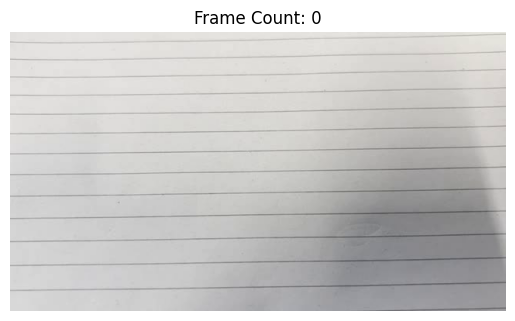

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

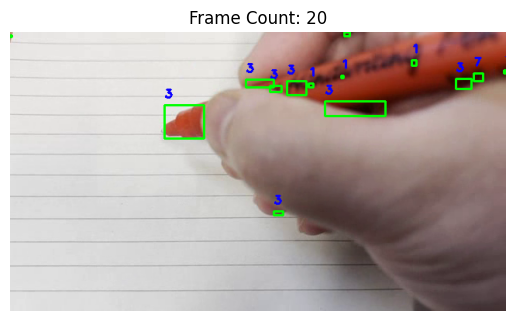

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

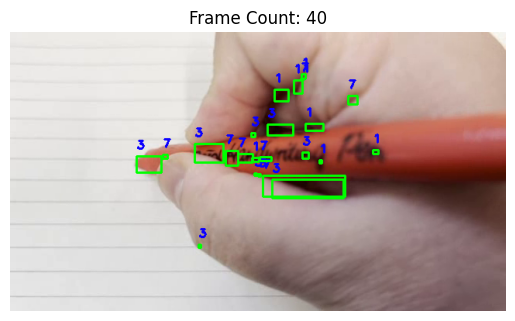

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

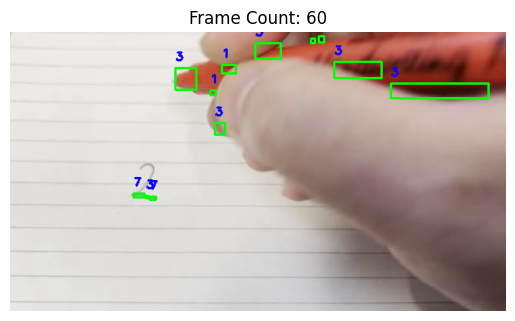

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

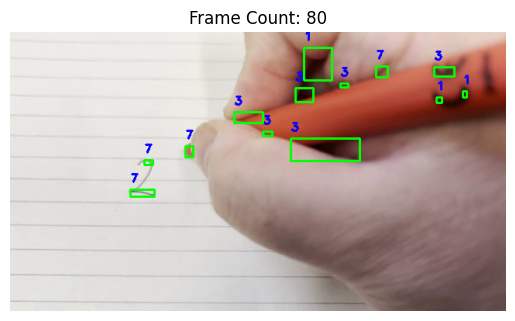

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

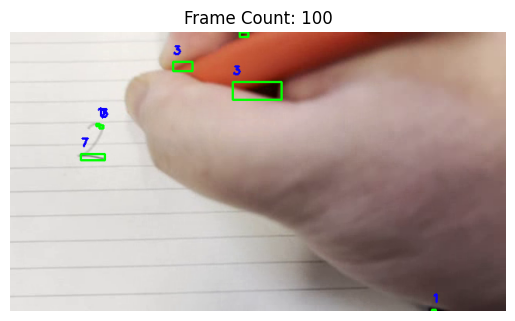

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

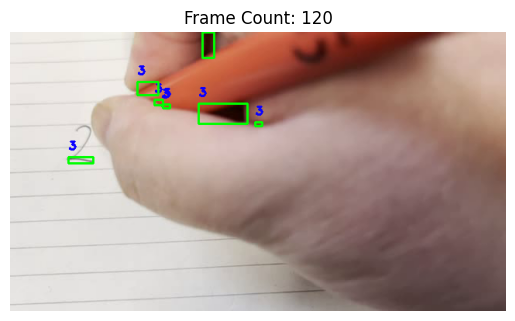

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

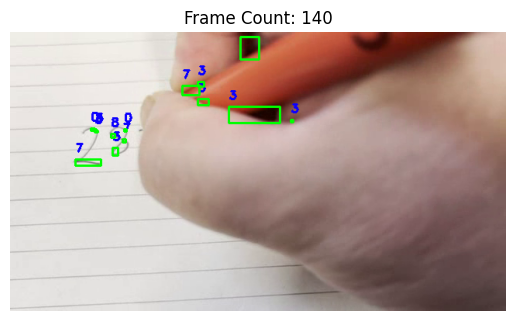

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

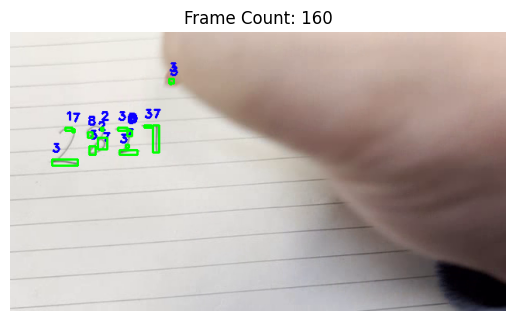

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

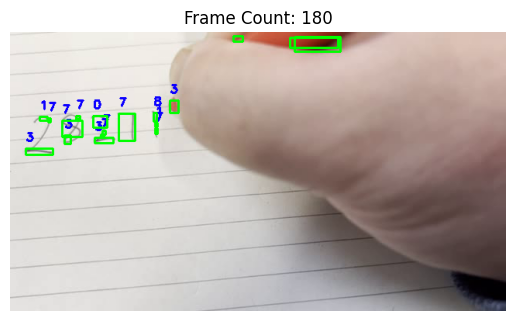

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

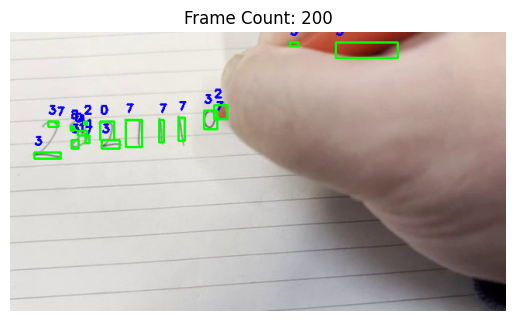

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

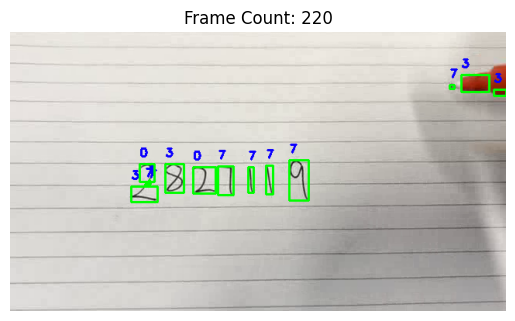

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

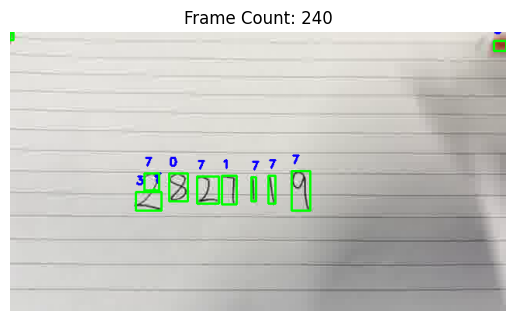

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [37]:
import pytesseract

# Ensure pytesseract is configured correctly
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

video_path = r"D:\SHU\ML_lab\Assesment\Number_Test_Data\015.avi"

def save_video(frames, output_file="output_video.avi", fps=30):
    """
    Save a list of frames as a video file.

    Args:
        frames (list): List of frames (numpy arrays).
        output_file (str): Output video file name.
        fps (int): Frames per second.
    """
    if not frames:
        raise ValueError("No frames to save.")

    frame_height, frame_width = frames[0].shape[:2]
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI format

    out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

    for frame in frames:
        if frame.shape[:2] != (frame_height, frame_width):
            raise ValueError("All frames must have the same dimensions.")
        out.write(frame)

    out.release()
    print(f"Video saved successfully as {output_file}")
def process_video_with_pytesseract(video_path):
    """
    Process a video to detect and classify digits using pytesseract.

    Args:
        video_path (str): Path to the input video.
    """
    if not video_path.endswith(".avi"):
        raise ValueError("Only .avi files are supported.")

    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0
    min_area = 0
    max_area = 100

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)
        binary_frame = cv2.adaptiveThreshold(
            blur_frame, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 99, 45
        )

        edges = cv2.Canny(binary_frame, 100, 200)
        kernel = np.ones((2, 2), np.uint8)
        eroded = cv2.erode(cv2.dilate(edges, kernel, iterations=1), kernel, iterations=1)
        contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if min_area != 0 and max_area != 0 and not (min_area <= area <= max_area):
                continue  # Skip contours that do not fall within the specified area range

            x, y, w, h = cv2.boundingRect(cnt)
        
            # Extract the digit from the frame
            # Define the padding (in pixels)
            padding = 10
            # Calculate the padded coordinates
            x_padded = max(x - padding, 0)  # Ensure x is not less than 0
            y_padded = max(y - padding, 0)  # Ensure y is not less than 0
            w_padded = min(x + w + padding, eroded.shape[1]) - x_padded  # Ensure width stays within image
            h_padded = min(y + h + padding, eroded.shape[0]) - y_padded  # Ensure height stays within image
            
            # Extract the padded bounding box
            digit_padded = frame[y_padded:y_padded+h_padded, x_padded:x_padded+w_padded]

            # Use pytesseract to recognize the digit
            # config = '--psm 10 -c tessedit_char_whitelist=0123456789'
            # predicted_digit = pytesseract.image_to_string(digit_padded, config=config).strip()

            # digit = cv2.bitwise_not(digit_padded)
            digit_gray = cv2.cvtColor(digit_padded, cv2.COLOR_BGR2GRAY)
            resized_digit = cv2.resize(digit_gray, (28, 28))
            normalized_digit = resized_digit / 255.0
            reshaped_digit = normalized_digit.reshape(1, 28, 28, 1)  # Add channel dimension for grayscale
            
            # Classify the digit
            prediction = model.predict(reshaped_digit)
            predicted_digit = np.argmax(prediction)

            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, str(predicted_digit), (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 12), 2)
            
        # Display every 20th frame with bounding boxes
        if frame_count % 20 == 0:
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Frame Count: {frame_count}")
            plt.axis("off")
            plt.show()

        frame_count += 1  # Increment the frame count
        frames.append(frame)

    cap.release()
    cv2.destroyAllWindows()
    save_video(frames)

# Call the function to process the video
process_video_with_pytesseract(video_path)
